# Prescription Parser :

This notebook contains steps to parse through prescriptions and extract details such as patient name, address, medicines, directions and refills.

### Step 1 : Convert pdf to image using pdf2image

In [20]:
from pdf2image import convert_from_path

In [21]:
pages = convert_from_path(r'docs\prescription\pre_1.pdf', poppler_path=r'C:\poppler-24.02.0\Library\bin')

poppler_path: This parameter specifies the path to the Poppler utility's binary files. Poppler is a PDF rendering library, and the pdf2image library depends on it for PDF processing. In this case, the path is set to r'C:\poppler-24.02.0\Library\bin'.



In [22]:
#displays the first page of the PDF document as an image 
pages[0].show()

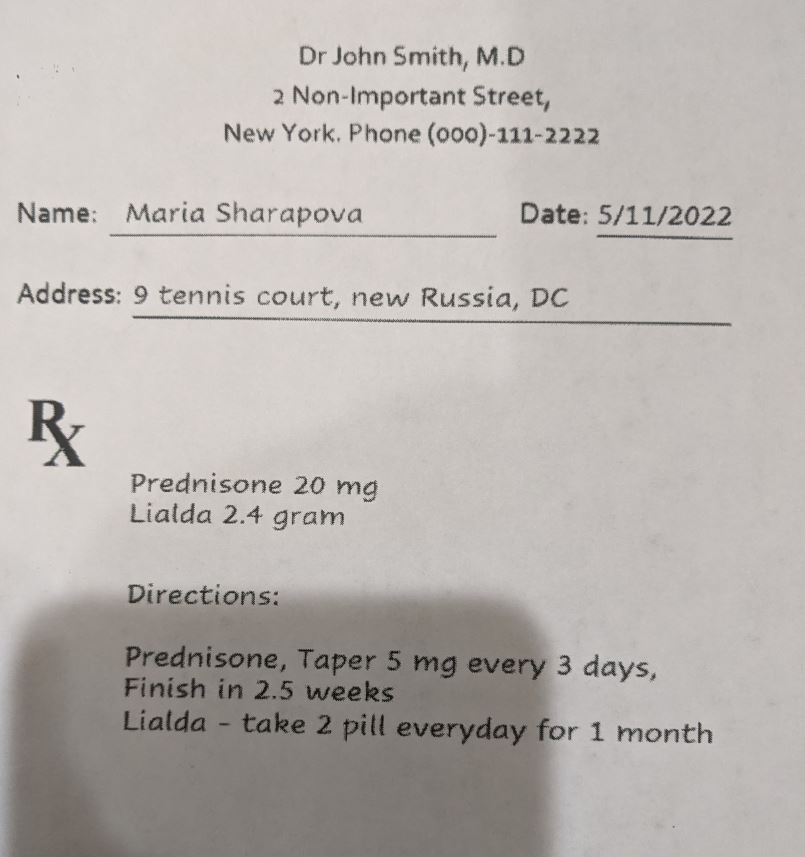

In [23]:
#Extracting text from image using pytesseract
import pytesseract

In [24]:
pytesseract.pytesseract.tesseract_cmd=r'C:\Program Files\Tesseract-OCR\tesseract.exe'
text = pytesseract.image_to_string(pages[0], lang='eng')
print(text)

Dr John Smith, M.D
2 Non-Important Street,
New York, Phone (000)-111-2222

Name: Maria Sharapova Date: 5/11/2022

Address: 9 tennis court, new Russia, DC

—moemenmannenneneneunmnnnnennieesisiyoinnitniahadaaanniihsnseneneneeeernnttnnneenrenen:

Prednisone 20 mg
Lialda 2.4 gram

3 days,

or 1 month



#### As you can see, pytesseract misses out on extracting the text which is present in the mobile shadow on the image. So we move on to Step 2.

### Step 2 : Preprocess the image using Computer Vision

### Computer Vision:

- In this project, computer vision techniques are employed to overcome challenges posed by image quality variations.
- Traditional optical character recognition (OCR) methods, like Pytesseract, may struggle with extracting text from images affected by shadows, uneven lighting, or low contrast.
- Computer vision offers a broader set of tools and algorithms to preprocess and enhance images before text extraction, making it more robust to such variations.


#### Adaptive Thresholding:

- Adaptive thresholding is a preprocessing technique used in computer vision.
- It separates foreground objects from the background in an image by calculating different threshold values for different regions.
- Unlike global thresholding, which uses a single threshold value for the entire image, adaptive thresholding adapts to local variations in illumination and contrast.


In [25]:
import numpy as np
import cv2
from PIL import Image


cv2: OpenCV (Open Source Computer Vision Library) is a popular library for computer vision tasks such as image and video processing, object detection, and more.

PIL.Image: The Python Imaging Library (PIL) provides support for opening, manipulating, and saving many different image file formats. In this case, we're specifically importing the Image module from the PIL package. The Image module from the Python Imaging Library (PIL) provides a wide range of functions for working with images

### Preprocess Image Function:

The preprocess_image function takes an image as input.
It converts the image to grayscale using cv2.cvtColor.
Then, it resizes the grayscale image using cv2.resize to enhance its features.
Finally, adaptive thresholding is applied using cv2.adaptiveThreshold to create a binary image, emphasizing object edges and enhancing contrast.





In [26]:
def preprocess_image(img):
    gray = cv2.cvtColor(np.array(img), cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(gray, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_LINEAR)
    processed_image = cv2.adaptiveThreshold(
        resized,
        255,
        cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
        cv2.THRESH_BINARY, 
        61,
        11
    )
    return processed_image

In [27]:
img = preprocess_image(pages[0])
Image.fromarray(img).show()

img = preprocess_image(pages[0]) preprocesses the image of the first page extracted from the PDF document using the preprocess_image function

Then, Image.fromarray(img).show() converts the preprocessed image array (img) back to a PIL Image object and displays it in a new window using the show() method.

The image after pre-processing looks like :

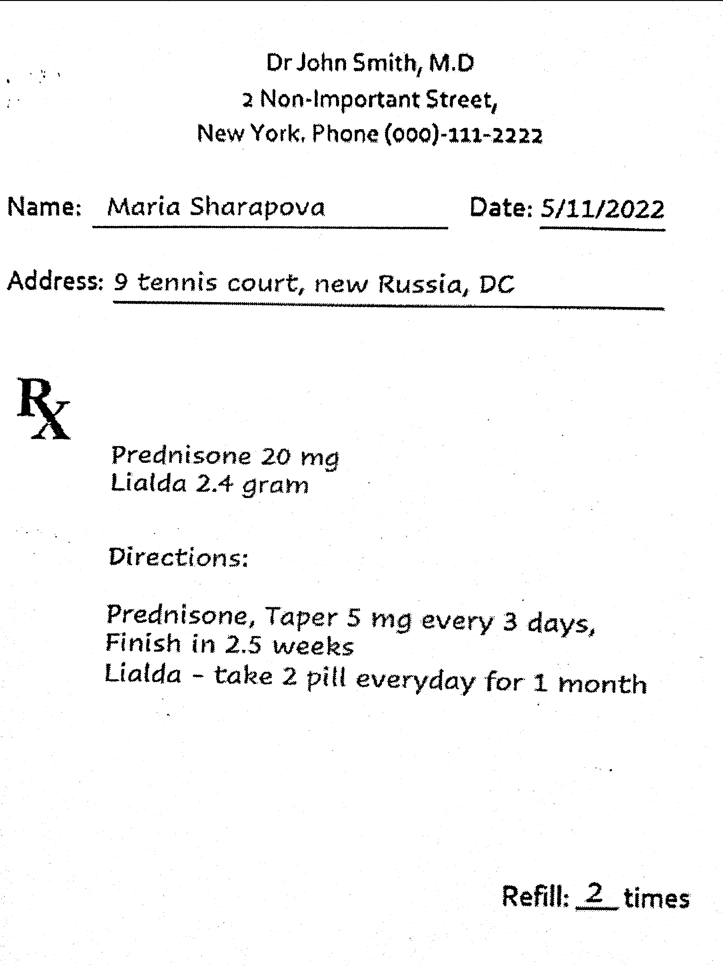

### Step 3: Extract text from image using pytesseract

In [28]:
pytesseract.pytesseract.tesseract_cmd=r'C:\Program Files\Tesseract-OCR\tesseract.exe'
text = pytesseract.image_to_string(img, lang='eng')
print(text)

Dr John Smith, M.D
2 Non-Important Street,
New York, Phone (000)-111-2222

Name: Marta Sharapova Date: 5/11/2022

Address: 9 tennis court, new Russia, DC

K

Prednisone 20 mg
Lialda 2.4 gram

Directions:

Prednisone, Taper 5 mig every 3 days,
Finish in 2.5 weeks a
Lialda - take 2 pill everyday for 1 month

Refill: 2 times



In [29]:
text = '''
Dr John Smith, M.D
2 Non-Important Street,
New York, Phone (000)-111-2222
Name: Marta Sharapova Date: 5/11/2022
Address: 9 tennis court, new Russia, DC

 
 

Prednisone 20 mg
Lialda 2.4 gram
Directions:
Prednisone, Taper 5 mg every 3 days,
Finish in 2.5 weeks -
Lialda - take 2 pill everyday for 1 month
Refill: 3 times
'''

### Step 4: Using regex(regular expressions) to match patterns and extract information from the text

#### Extract Name

In [30]:
import re

pattern = 'Name:(.*)Date'

matches = re.findall(pattern, text)
matches[0].strip()

'Marta Sharapova'

#### Extract Address

In [35]:
pattern = 'Address:(.*)\n'

matches = re.findall(pattern, text)
matches[0].strip()

'9 tennis court, new Russia, DC'

#### Extract Medicines

In [36]:
pattern = 'Address[^\n]*(.*)Directions'

matches = re.findall(pattern, text, flags=re.DOTALL)
matches[0].strip()

'Prednisone 20 mg\nLialda 2.4 gram'

#### Extract Directions

In [37]:
pattern = 'Directions:(.*)Refill'

matches = re.findall(pattern, text, flags=re.DOTALL)
matches[0].strip()

'Prednisone, Taper 5 mg every 3 days,\nFinish in 2.5 weeks -\nLialda - take 2 pill everyday for 1 month'

#### Extract Refill

In [38]:
pattern = 'Refill:(.*)times'

matches = re.findall(pattern, text, flags=re.DOTALL)
matches[0].strip()

'3'

#### Conclusion:

The prescription_parser notebook aimed to extract structured data from medical documents in PDF format. It followed a four-step process:

- PDF to Image Conversion: 

Utilizing the pdf2image library, the PDF documents were converted into image formats, enabling further processing.

- Image Preprocessing with Computer Vision: 

Computer vision techniques, implemented with OpenCV, were applied to preprocess the images. Techniques like grayscale conversion, resizing, and adaptive thresholding were used to enhance text visibility and remove noise.

- Text Extraction with Pytesseract:

The preprocessed images were passed through Pytesseract, a tool for Optical Character Recognition (OCR), to extract text from the images.

- Pattern Matching with Regex: 

Extracted text was analyzed using regular expressions to identify and extract relevant information based on predefined patterns, enabling structured data extraction.

By combining PDF processing, computer vision, OCR, and regex pattern matching, the project achieved efficient extraction of medical data from documents, facilitating tasks like prescription analysis and patient information retrieval.

